In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
from urllib.request import urlretrieve
iris = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv'
urlretrieve(iris)
Iris= pd.read_csv(iris, sep=',')
Iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
X = Iris.iloc[:, 0:4].values
y = Iris.iloc[:, 4].values


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [23]:
y_pred = classifier.predict(X_test)
print(y_pred)


['setosa' 'versicolor' 'versicolor' 'setosa' 'virginica' 'setosa'
 'versicolor' 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa' 'setosa'
 'setosa' 'versicolor' 'virginica' 'versicolor' 'virginica' 'versicolor'
 'virginica' 'virginica' 'versicolor' 'virginica' 'setosa' 'setosa'
 'virginica' 'virginica' 'setosa' 'virginica' 'setosa']


In [24]:
print(y_test)

['setosa' 'versicolor' 'versicolor' 'setosa' 'virginica' 'setosa'
 'versicolor' 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa' 'setosa'
 'setosa' 'versicolor' 'virginica' 'versicolor' 'virginica' 'versicolor'
 'virginica' 'virginica' 'versicolor' 'virginica' 'setosa' 'setosa'
 'virginica' 'versicolor' 'setosa' 'virginica' 'setosa']


In [25]:
print(classifier.score(X_test, y_test)) 

0.9666666666666667


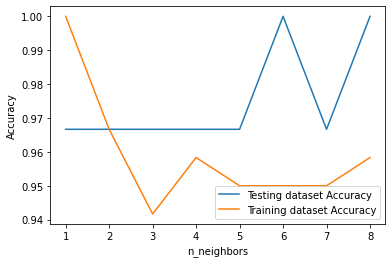

In [26]:
neighbors = np.arange(1, 9) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
      
    # Compute traning and test data accuracy 
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test) 
  
# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      0.89      0.94         9
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

